Data Collection

In [ ]:
import pandas as pd

# membaca file dan perlu dilakukan encoding latin-1
dataset = pd.read_csv("dataset-original.txt", sep="\t", names=["Label", "Tweet"], encoding='ISO-8859-1', header=0)

# buat data menjadi csv untuk melihat hasilnya
data_hs = pd.DataFrame(dataset)
data_hs.to_csv("dataset.csv")

dataset.head(10)

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
5,Non_HS,@felixsiauw masih bnyak hal agamis yg bisa dib...
6,Non_HS,@saidaqil apa maksud pernyataan. Anda? Apa and...
7,Non_HS,Ahok Akan Integrasikan Transportasi Publik den...
8,Non_HS,"Ahok mampu melawan korupsi di ibukota, bangun ..."
9,Non_HS,"Awasi Kecurangan Pilkada, Agus - Sylvi Pakai A..."


<ipython-input-19-f3340db2c9ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


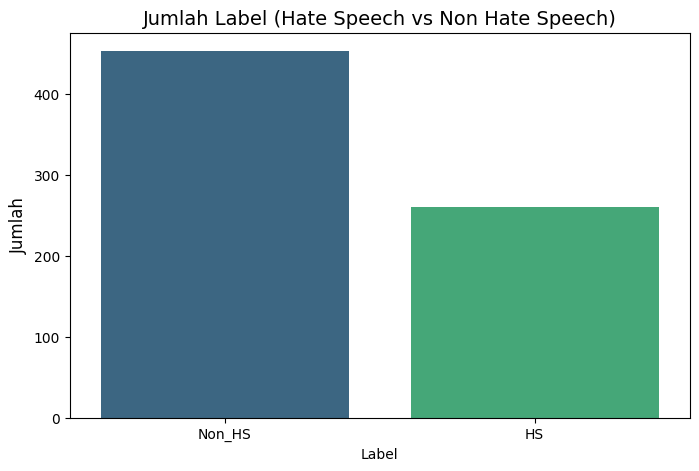

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


label_counts = dataset['Label'].value_counts()

# Membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Jumlah Label (Hate Speech vs Non Hate Speech)', fontsize=14)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

Preprocessing

<ipython-input-20-be1a2c1ecdbb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


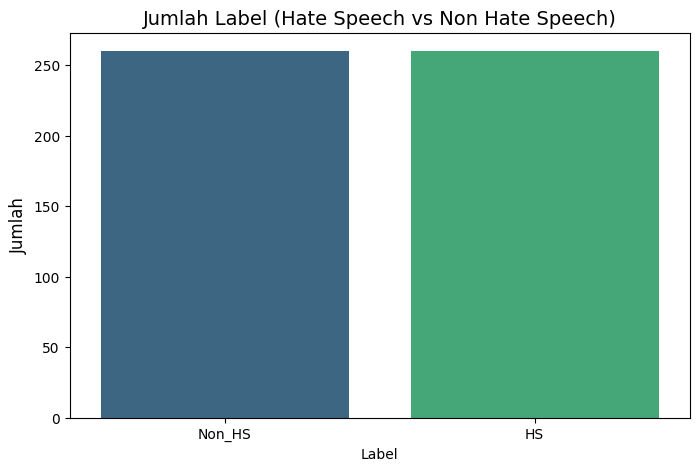

In [ ]:
# Seimbangkan kelas non-hate speech agar setara dengan hate speech
# Pisahkan data berdasarkan label
hs_data = dataset[dataset["Label"] == "HS"]
non_hs_data = dataset[dataset["Label"] == "Non_HS"]

# Hitung jumlah data masing-masing label
hs_count = len(hs_data)

# pakai jumlah baris tergantung jumlah hs
non_hs_sampled = non_hs_data.iloc[:hs_count]

# Gabungkan kembali dataset
balanced_dataset = pd.concat([non_hs_sampled, hs_data,])
balanced_dataset.to_csv("dataset-seimbang.csv", index=False, encoding="ISO-8859-1")

label_counts = balanced_dataset['Label'].value_counts()
# Membuat bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Jumlah Label (Hate Speech vs Non Hate Speech)', fontsize=14)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

In [ ]:
# pakai dataset balanced
dataset = balanced_dataset

# mengubah teks ke huruf kecil
def lowercase(text):
    return text.lower()

dataset['Cleaned_Tweet'] = dataset['Tweet'].apply(lowercase)
dataset.head(10)
# dataset.shape

,Label,Tweet,Cleaned_Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,rt @spardaxyz: fadli zon minta mendagri segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,rt @baguscondromowo: mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","ahmad dhani tak puas debat pilkada, masalah ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,rt @lisdaulay28: waspada ktp palsu.....kawal p...
5,Non_HS,@felixsiauw masih bnyak hal agamis yg bisa dib...,@felixsiauw masih bnyak hal agamis yg bisa dib...
6,Non_HS,@saidaqil apa maksud pernyataan. Anda? Apa and...,@saidaqil apa maksud pernyataan. anda? apa and...
7,Non_HS,Ahok Akan Integrasikan Transportasi Publik den...,ahok akan integrasikan transportasi publik den...
8,Non_HS,"Ahok mampu melawan korupsi di ibukota, bangun ...","ahok mampu melawan korupsi di ibukota, bangun ..."
9,Non_HS,"Awasi Kecurangan Pilkada, Agus - Sylvi Pakai A...","awasi kecurangan pilkada, agus - sylvi pakai a..."


In [ ]:
import re

# untuk melihat perbandingan dengan step sebelumnya
dataset['Tweet'] = dataset['Cleaned_Tweet']

# Menghapus URL, retweet dan tanda baca
def clean_text(text):
    # Hapus URL
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Hapus mentions (@username) dan hashtags (#hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus retweet (RT @username: )
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)
    # Hapus tanda baca (kecuali spasi dan kata-kata)
    text = re.sub(r'[^\w\s]', '', text)
    # Hapus angka
    text = re.sub(r"\d+", "", text)
    # Hapus spasi tambahan
    text = text.strip()
    return text

dataset['Cleaned_Tweet'] = dataset['Cleaned_Tweet'].apply(clean_text)
# dataset.head(10)

# Simpan hasil preprocessing untuk verifikasi
dataset.to_csv("hasil_pembersihanawal.csv", index=False)
dataset.head(10)

,Label,Tweet,Cleaned_Tweet
0,Non_HS,rt @spardaxyz: fadli zon minta mendagri segera...,fadli zon minta mendagri segera menonaktifkan ...
1,Non_HS,rt @baguscondromowo: mereka terus melukai aksi...,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,"ahmad dhani tak puas debat pilkada, masalah ja...",ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,rt @lisdaulay28: waspada ktp palsu.....kawal p...,waspada ktp palsukawal pilkada
5,Non_HS,@felixsiauw masih bnyak hal agamis yg bisa dib...,masih bnyak hal agamis yg bisa dibahas kenapa ...
6,Non_HS,@saidaqil apa maksud pernyataan. anda? apa and...,apa maksud pernyataan anda apa anda mengaminka...
7,Non_HS,ahok akan integrasikan transportasi publik den...,ahok akan integrasikan transportasi publik den...
8,Non_HS,"ahok mampu melawan korupsi di ibukota, bangun ...",ahok mampu melawan korupsi di ibukota bangun i...
9,Non_HS,"awasi kecurangan pilkada, agus - sylvi pakai a...",awasi kecurangan pilkada agus sylvi pakai apl...


In [ ]:
# Membaca dan membersihkan kamus alay
kamus_alay = pd.read_csv('colloquial-indonesian-lexicon.csv', encoding='latin-1')
kamus_alay = kamus_alay.drop(['In-dictionary', 'context', 'category1', 'category2', 'category3;;'], axis=1)
kamus_alay = kamus_alay.rename(columns={'slang': 'original', 'formal': 'replacement'})

# Mengisi NaN pada kolom replacement dengan string kosong
kamus_alay['replacement'] = kamus_alay['replacement'].fillna('')

# Membuat kamus dalam bentuk dictionary
alay_dict = dict(zip(kamus_alay['original'], kamus_alay['replacement']))

# untuk melihat perbandingan dengan step sebelumnya
dataset['Tweet'] = dataset['Cleaned_Tweet']

# Membuat fungsi mengganti kata alay menggunakan regex
def replace_alay_with_regex(text, alay_dict):
    # Membuat pattern regex dari semua kata alay
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, alay_dict.keys())) + r')\b')
    # Mengganti kata berdasarkan kamus
    return pattern.sub(lambda x: alay_dict[x.group()], text)

dataset['Cleaned_Tweet'] = dataset['Cleaned_Tweet'].apply(lambda x: replace_alay_with_regex(str(x), alay_dict))

# Simpan hasil preprocessing untuk verifikasi
dataset.to_csv("dataset_preprocessed.csv", index=False)

dataset.head(10)

,Label,Tweet,Cleaned_Tweet
0,Non_HS,fadli zon minta mendagri segera menonaktifkan ...,fadli zon meminta mendagri segera menonaktifka...
1,Non_HS,mereka terus melukai aksi dalam rangka memenja...,mereka terus melukai aksi dalam rangka memenja...
2,Non_HS,sylvi bagaimana gurbernur melakukan kekerasan ...,sylvi bagaimana gurbernur melakukan kekerasan ...
3,Non_HS,ahmad dhani tak puas debat pilkada masalah jal...,ahmad dhani tak puas debat pilkada masalah jal...
4,Non_HS,waspada ktp palsukawal pilkada,waspada ktp palsukawal pilkada
5,Non_HS,masih bnyak hal agamis yg bisa dibahas kenapa ...,masih banyak hal agamis yang bisa dibahas kena...
6,Non_HS,apa maksud pernyataan anda apa anda mengaminka...,apa maksud pernyataan anda apa anda mengaminka...
7,Non_HS,ahok akan integrasikan transportasi publik den...,ahok akan integrasikan transportasi publik den...
8,Non_HS,ahok mampu melawan korupsi di ibukota bangun i...,ahok mampu melawan korupsi di ibukota bangun i...
9,Non_HS,awasi kecurangan pilkada agus sylvi pakai apl...,awasi kecurangan pilkada agus sylvi pakai apl...


In [ ]:
# Stopword
kamus_stopword = pd.read_csv('kamus-stopword.txt', header=None)
kamus_stopword = kamus_stopword.rename(columns={0: 'stopword'})
# kamus_stopword.head(5)

def remove_stopword(text):
    text = ' '.join(['' if word in kamus_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

# untuk melihat perbandingan dengan step sebelumnya
dataset['Tweet'] = dataset['Cleaned_Tweet']

dataset['Cleaned_Tweet'] = dataset['Cleaned_Tweet'].apply(remove_stopword)

# Simpan hasil stopword untuk verifikasi
dataset.to_csv("dataset_stopworddone.csv", index=False)

dataset.head(10)

,Label,Tweet,Cleaned_Tweet
0,Non_HS,fadli zon meminta mendagri segera menonaktifka...,fadli zon mendagri menonaktifkan ahok gubernur...
1,Non_HS,mereka terus melukai aksi dalam rangka memenja...,melukai aksi rangka memenjarakan ahok ahok gag...
2,Non_HS,sylvi bagaimana gurbernur melakukan kekerasan ...,sylvi gurbernur kekerasan perempuan buktinya foto
3,Non_HS,ahmad dhani tak puas debat pilkada masalah jal...,ahmad dhani puas debat pilkada jalan bekasi te...
4,Non_HS,waspada ktp palsukawal pilkada,waspada ktp palsukawal pilkada
5,Non_HS,masih banyak hal agamis yang bisa dibahas kena...,agamis dibahas pilkada tingkat keimanan sebata...
6,Non_HS,apa maksud pernyataan anda apa anda mengaminka...,maksud pernyataan mengaminkan kriminalisasi ah...
7,Non_HS,ahok akan integrasikan transportasi publik den...,ahok integrasikan transportasi publik sistem s...
8,Non_HS,ahok mampu melawan korupsi di ibukota bangun i...,ahok melawan korupsi ibukota bangun infrastruk...
9,Non_HS,awasi kecurangan pilkada agus sylvi pakai apl...,awasi kecurangan pilkada agus sylvi pakai apli...


In [ ]:
# install sastrawi

!pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Stemming
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

# untuk melihat perbandingan dengan step sebelumnya
dataset['Tweet'] = dataset['Cleaned_Tweet']

dataset['Cleaned_Tweet'] = dataset['Cleaned_Tweet'].apply(stemming)
dataset['Tweet'] = dataset['Cleaned_Tweet']
dataset = dataset.drop(['Cleaned_Tweet'], axis=1)

# Simpan hasil stopword untuk verifikasi
dataset.to_csv("dataset_hasilakhir.csv", index=False)
dataset.head(10)

,Label,Tweet
0,Non_HS,fadli zon mendagri nonaktif ahok gubernur dki
1,Non_HS,luka aksi rangka penjara ahok ahok gagal pilkada
2,Non_HS,sylvi gurbernur keras perempuan bukti foto
3,Non_HS,ahmad dhani puas debat pilkada jalan bekas ungkap
4,Non_HS,waspada ktp palsukawal pilkada
5,Non_HS,agam bahas pilkada tingkat iman batas pilkada
6,Non_HS,maksud nyata amin kriminalisasi ahok hati mulut
7,Non_HS,ahok integrasi transportasi publik sistem sing...
8,Non_HS,ahok lawan korupsi ibukota bangun infrastruktu...
9,Non_HS,awas curang pilkada agus sylvi pakai aplikasi


Ekstraksi Fitur

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Extract text data
texts = dataset['Tweet'].astype(str)

# Word unigram and bigram
word_vectorizer = CountVectorizer(ngram_range=(1, 2), analyzer='word')
word_features = word_vectorizer.fit_transform(texts)
word_feature_names = word_vectorizer.get_feature_names_out()

# Character trigram and quadragram
char_vectorizer = CountVectorizer(ngram_range=(3, 4), analyzer='char')
char_features = char_vectorizer.fit_transform(texts)
char_feature_names = char_vectorizer.get_feature_names_out()

# Combine features into a DataFrame
feature_data = pd.DataFrame.sparse.from_spmatrix(word_features, columns=word_feature_names)
feature_data = pd.concat([feature_data, pd.DataFrame.sparse.from_spmatrix(char_features, columns=char_feature_names)], axis=1)

# simpan label
feature_data['Label_Tweet'] = dataset['Label'].values

# Save the extracted features
feature_data.to_csv('extracted_features.csv', index=False)


Klasifikasi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_csv("extracted_features.csv")
data.head(5)

# Pisahkan fitur dan label
X = data.drop(columns=["Label_Tweet"])  # Asumsikan kolom 'Label' adalah label
y = data["Label_Tweet"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model menggunakan data pelatihan
svm_model.fit(X_train, y_train)

# Prediksi data pengujian
y_pred = svm_model.predict(X_test)

Evaluasi

In [ ]:
# cek distribusi data train
# Hitung distribusi label di data pelatihan
train_label_distribution = y_train.value_counts()

print("Distribusi Label pada Data Pelatihan:")
print(train_label_distribution)

# Hitung persentase distribusi
train_label_percentage = (train_label_distribution / len(y_train)) * 100

print("\nPersentase Distribusi Label pada Data Pelatihan:")
print(train_label_percentage)

Distribusi Label pada Data Pelatihan:
Label_Tweet
HS        212
Non_HS    204
Name: count, dtype: int64

Persentase Distribusi Label pada Data Pelatihan:
Label_Tweet
HS        50.961538
Non_HS    49.038462
Name: count, dtype: float64



Laporan testing:
Accuracy: 0.8269
Precision: 0.8750
Recall: 0.7292
Specificity: 0.7292
F1-Score: 0.7955
AUC: 0.9003


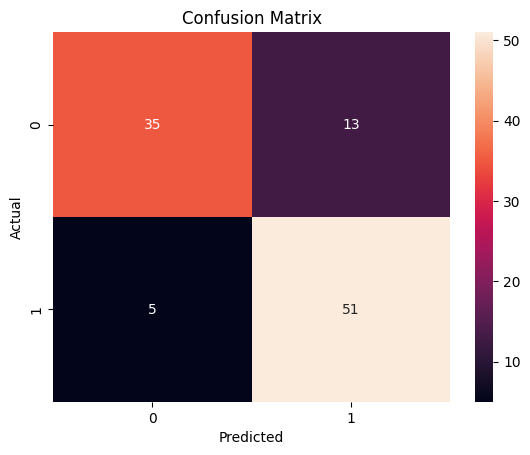

In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix)

# Hitung probabilitas untuk AUC
y_pred_proba = svm_model.decision_function(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Test metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, pos_label='HS')
test_recall = recall_score(y_test, y_pred, pos_label='HS')
test_specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
test_f1 = f1_score(y_test, y_pred, pos_label='HS')
test_auc = roc_auc_score(y_test, svm_model.decision_function(X_test))

# Laporan testing
print(f"\nLaporan testing:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Specificity: {test_specificity:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"AUC: {test_auc:.4f}")

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Kesimpulan

gagal ketika melakukan spelling correction karena saat diubah ada beberapa kalimat yang menjadi berbeda maknanya
saat kata tersebut disesuaikan dan ada kata yang sudah benar tapi disesuaikan